In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
class Regressor():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    
    # implement optimization function
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    
    # test the model on test data
    def predict(self,X):
        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs,'-.o')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
    
    def weights(self):
        return self.W, self.b


In [3]:
# load the boston housing dataset
from sklearn.datasets import load_boston
data = load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df['Target']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


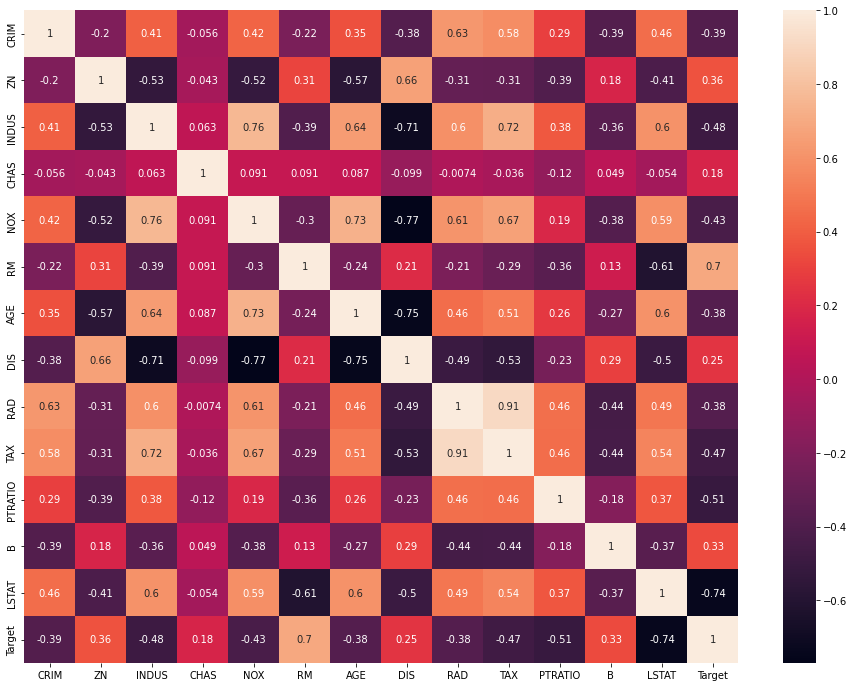

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

# **LSTAT**

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: 0.05824247565130947
Test Score:  0.07166145468312879


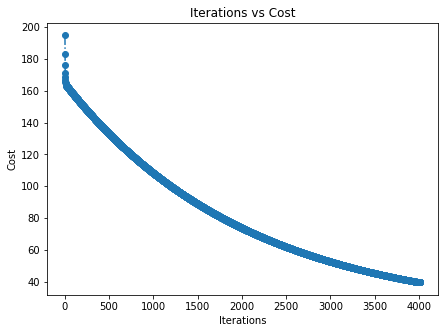

In [40]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.LSTAT.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.001,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [41]:
regressor.weights()

(array([-0.1669638]), 21.553239043399024)

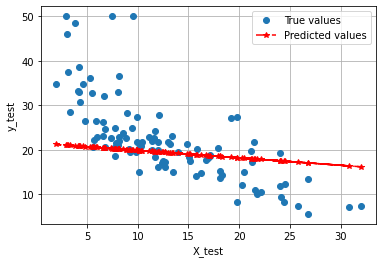

In [42]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

**Changing LSTAT learning rate to 0.0001**

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: -2.80297193232656
Test Score:  -3.0095246653298764


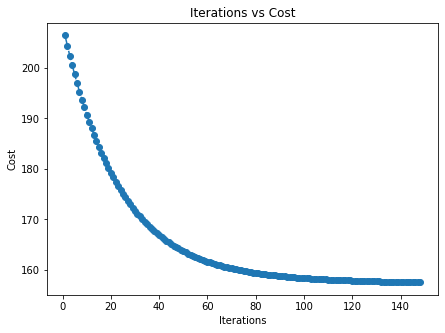

In [20]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.LSTAT.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.0001,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [21]:
regressor.weights()

(array([1.07377496]), 0.15871330041865686)

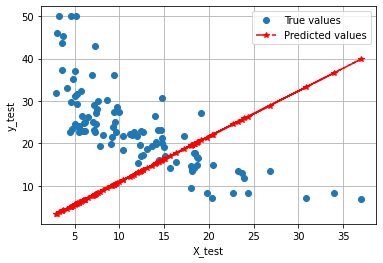

In [22]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

**LSTAT Learning rate changed to 0.01**

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: -8.350176812826504
Test Score:  -9.723584291479897


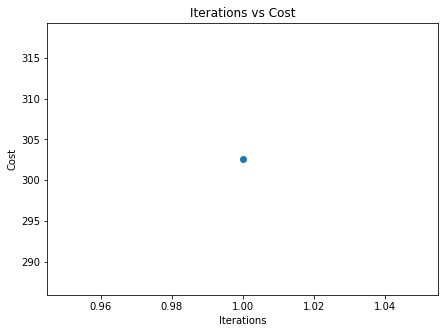

In [23]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.LSTAT.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.01,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()


In [24]:
regressor.weights()

(array([-0.40308104]), 0.14889761303017796)

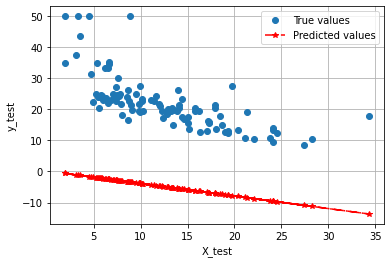

In [25]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

The best learning rate for LSTAT was 0.001, as it gives the best fit!

# **Taking RM**

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: 0.3161029630898786
Test Score:  0.2461902077887289


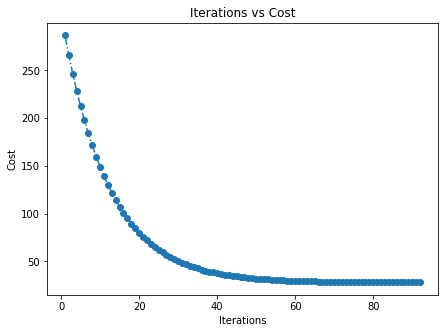

In [31]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.RM.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.001,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()



In [32]:

regressor.weights()

(array([3.50518706]), 0.49678452501031445)

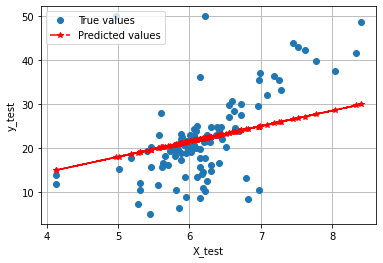

In [33]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

**Changing learning rate to 0.01 for RM**

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: 0.28266565493586515
Test Score:  0.3416742288874861


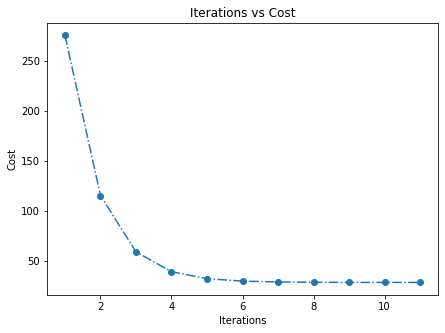

In [34]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.RM.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.01,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()



In [35]:

regressor.weights()

(array([3.51301937]), 0.4972190616744705)

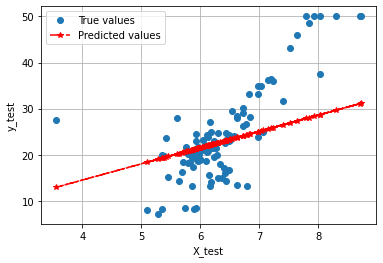

In [36]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

**Changing Learning rate to 0.1**

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: -342.31953909762956
Test Score:  -353.79289548576793


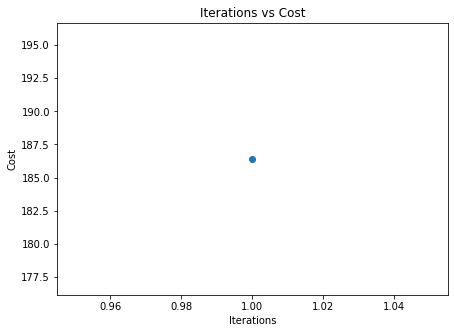

In [44]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.RM.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.1,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()



In [45]:
regressor.weights()

(array([-22.73390861]), -3.7942943323999767)

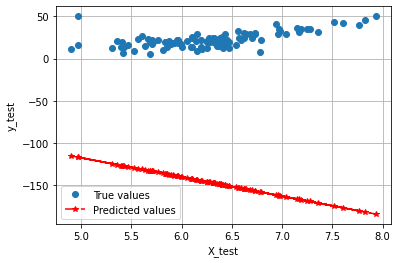

In [46]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

Best Learning rate parameter with RM was 0.001 as it gives the best fit!

X_train:(404, 13)
y_train:(404,)
X_test:(102, 13)
y_test:(102,)
Train Score: 0.7092356140486693
Test Score:  0.7903408725170099


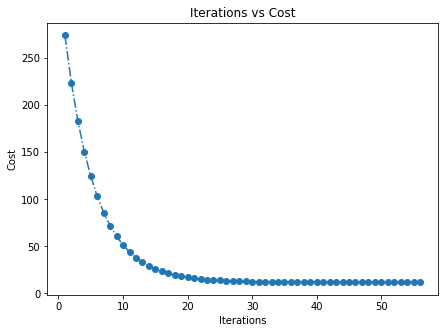

In [37]:
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(data.data, data.target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.1,normalize=True)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [38]:
regressor.weights()

(array([-0.66372963,  0.46829657, -0.47285873,  0.80812695, -1.17708891,
         2.64411193, -0.1052485 , -2.23301258,  0.99051581, -0.518279  ,
        -1.72592772,  0.83562348, -3.76629167]), 22.11317733215185)

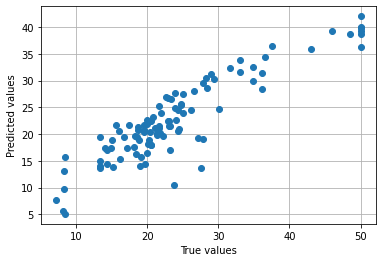

In [39]:
plt.plot(y_test,regressor.predict(X_test),'o')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid()